In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import chi2_contingency

df = pd.read_csv('HRDataset.csv')

In [71]:
df.drop(['LastPerformanceReview_Date', 'DaysLateLast30'], axis=1, inplace=True)
df.dropna(thresh=2, inplace=True)
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m/%d/%Y')

In [72]:
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019, 9, 27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire']) / np.timedelta64(1, 'Y')


df['Seniority'] = df.apply(lambda row: count_seniority(row), axis=1)

In [73]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.923288
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.726027
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.997260
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158904
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.410959


1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?


In [74]:
# zmienna 'PerformanceScore' jest zmienną kategoryczną dlatego najlepszym rozwiązaniem dla zbadania zależności będzie wykorzystanie testu chi-kwadrat
df['PerformanceScore'].unique()

array(['Fully Meets', 'PIP', 'Exceeds', 'Needs Improvement'], dtype=object)

In [75]:
# tabela krzyżowa dla zmiennych 'ManagerID' i 'PerformanceScore'
contingency_table = pd.crosstab(df["ManagerID"], df["PerformanceScore"])

In [76]:
# przeprowadzenie testu chi-kwadrat i obliczenie p-wartości
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [77]:
print("Wynik chi-kwadrat:", chi2)
print("Wartość p:", p_value)

Wynik chi-kwadrat: 67.79033848168551
Wartość p: 0.41590537598488814


WNIOSKI: Otrzymana p-wartość równa 0.41590537598488814 oznacza, że nie ma wystarczających dowodów na istnienie istotnej statystycznie zależności między `ManagerID` a `PerformanceScore`.

2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?


In [78]:
# Obliczenie średniego stażu pracy dla każdego źródła rekrutacji
avg_tenure_by_source = df.groupby("RecruitmentSource")["Seniority"].mean().sort_values(ascending=False).head(5)

In [79]:
print("TOP5 źródeł rekrutacji:")
print(avg_tenure_by_source)

TOP5 źródeł rekrutacji:
RecruitmentSource
Careerbuilder         8.487671
Other                 6.457534
Billboard             5.866781
MBTA ads              5.733441
Website Banner Ads    5.725395
Name: Seniority, dtype: float64


3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

In [80]:
contingency_table = pd.crosstab(df["MaritalDesc"], df["EmpSatisfaction"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [81]:
print("Wynik chi-kwadrat:", chi2)
print("Wartość p:", p_value)

Wynik chi-kwadrat: 33.36128013737227
Wartość p: 0.006616683516433504


WNIOSKI: P-wartość wskazuje że istnieje statystycznie istotny związek między stanem cywilnym a zadowoleniem z pracy

4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [82]:
# funkcja zliczająca wiek pracownika
def count_age(row):
    return (dt.datetime(2019, 9, 27) - row['DOB']) / np.timedelta64(1, 'Y')

In [86]:
# dodanie kolumny z wiekiem
df['Age'] = df.apply(lambda row: count_age(row), axis=1)
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.923288,31.863014
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.726027,35.443836
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.997260,33.093151
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158904,34.052055
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.410959,31.378082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,4.882192,-32.331507
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,4.882192,33.452055
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,3.243836,36.654795
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,4.882192,-45.983562


In [87]:
# Filtrowanie obecnie zatrudnionych pracowników i błędów w dacie urodzenia
df_clean_age = df[df["Age"] > 0]
currently_employed = df_clean_age[df_clean_age["DateofTermination"].isna()]

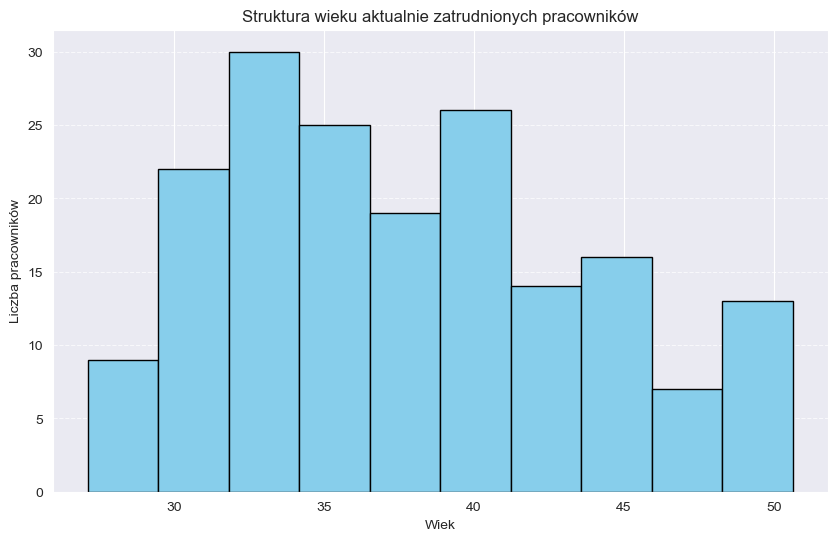

In [88]:
# Tworzenie histogramu wieku
plt.figure(figsize=(10, 6))
plt.hist(currently_employed["Age"], bins=10, color="skyblue", edgecolor="black")
plt.title("Struktura wieku aktualnie zatrudnionych pracowników")
plt.xlabel("Wiek")
plt.ylabel("Liczba pracowników")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [89]:
# Grupowanie według przedziałów wiekowych
bins = [20, 30, 40, 50, 60, 70]  # Przedziały wiekowe
labels = ["20-29", "30-39", "40-49", "50-59", "60-69"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

In [96]:
# Obliczenie średniej liczby projektów dla każdej grupy wiekowej
projects_by_age = df.groupby("AgeGroup")["SpecialProjectsCount"].mean().reset_index()

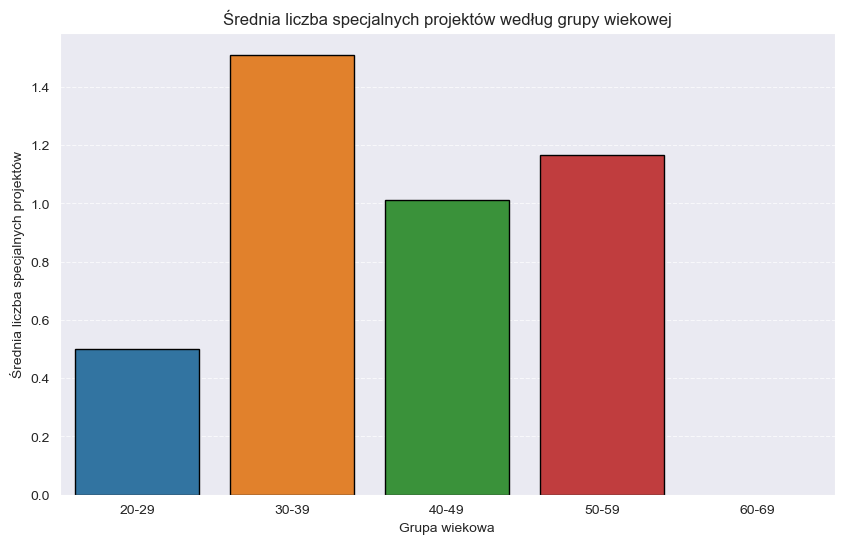

In [94]:
# wykres kolumnowy
plt.figure(figsize=(10, 6))
sns.barplot(x="AgeGroup", y="SpecialProjectsCount", data=projects_by_age, hue="AgeGroup", legend=False,
            edgecolor="black")
plt.title("Średnia liczba specjalnych projektów według grupy wiekowej")
plt.xlabel("Grupa wiekowa")
plt.ylabel("Średnia liczba specjalnych projektów")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

WNIOSKI: Nad projektami specjalnymi pracują głównie pracownicy z grupy wiekowej 30-39 lat.